In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Scenario 1
* Suppose we have two points in one dimensional space with positions $x_1(t)$ and $x_2(t)$ that have same mass $m_1 = m_2$. 
* Each point has initial velocity $v_1(0) = -v_2(0)$
* Simulate the trajectories of the points!

In [125]:
n = 2              # number of points
m = 1              # mass
T = 1
dt = 0.1
k = int(T/dt)
t = np.linspace(0, T, k+1)

x = np.zeros(n).reshape(1, n)    # list of positions
v = np.zeros(n).reshape(1, n)    # list of velocities

In [126]:
# initial configurations
x[0] = 0.3, 0.6
v[0] = 0.2, -0.2

In [127]:
for i in range(k):
    
    v_ii = v[i] 
    x_ii = x[i] + dt * v_ii
    
    v = np.vstack((v, v_ii))
    x = np.vstack((x, x_ii))

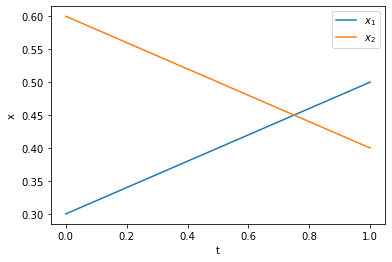

In [135]:
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x[:, 0])
plt.plot(t, x[:, 1])
plt.legend(['$x_1$', '$x_2$']);

As you can see that our points crossing over. Now we want collision to be happened in our system. In particular, elastic collision will be simulated.

## Scenario 2
* Implemented elastic collision.
* Adding collision algorithm which collision is happened when the distance between two particles d < 0.01.

#### Elastic collision in one dimenssion
##### Conservation of momentum
Conservation of momentum state that the total momentum, for case of collision, before collision and after the collision is constant. The conservation of two particles follows
$$
    m_1 \vec{u_1} + m_2 \vec{u_2} = m_1 \vec{v_1} + m_2 \vec{v_2}
$$
where the number in supscript indicates the particle, $m$ is the mass of particle, $u$ is the particle velocity before collision, $v$ is the particle velocity after the collision. 
##### Conservation of kinetic energy
Conservation of kinetic energy also state that the total kinetic energy before and after the collision is unchanged. It can be written as follow
$$
    \frac{1}{2} m_1 \vec{u}_1^2 + \frac{1}{2} m_2 \vec{u}_2^2 = \frac{1}{2} m_1 \vec{v}_1^2 + \frac{1}{2} m_2 \vec{v}_2^2
$$
##### Particles velocity after collision
The particle velocity after collision can be derived in this way
* Conservation of momentum 
$$ m_1 (\vec{u}_1 - \vec{v}_1)  = m_2 (\vec{v}_2 - \vec{u}_2)$$
* Conservation of kinetic energy
$$ m_1 (\vec{u}_1 - \vec{v}_1) (\vec{u}_1 + \vec{v}_1) = m_2 (\vec{v}_2 - \vec{u}_2) (\vec{v}_2 + \vec{u}_2) $$
* Divide equation of conservation momentum by conservation of kinetic energy
$$ \vec{v}_1 = \vec{v}_2 + \vec{u}_2 - \vec{u}_1 $$
$$ \vec{v}_2 = \vec{v}_1 + \vec{u}_1 - \vec{u}_2 $$
* Subtitute $v_1$ to equation of conservation momentum, also for $v_2$
$$ \vec{v}_1 = \frac{\vec{u}_1(m_1 - m_2) + 2 m_2 \vec{u}_2}{m_1 + m_2} $$
$$ \vec{v}_2 = \frac{\vec{u}_2(m_2 - m_1) + 2 m_1 \vec{u}_1}{m_1 + m_2} $$

In [57]:
n = 2              # number of points
m = 1              # mass
T = 1
dt = 0.01
k = int(T/dt)
t = np.linspace(0, T, k+1)

x = np.zeros(n).reshape(1, n)    # list of positions
v = np.zeros(n).reshape(1, n)    # list of velocities

In [58]:
# initial configurations
x[0] = 0.3, 0.6
v[0] = 0.4, -0.4

In [59]:
for i in range(k):
    
    # collision
    d = abs(x[i,1] - x[i,0])
    if d < 0.01:
        u_1 = v[i,0]
        u_2 = v[i,1]
        v[i,0] = u_2
        v[i,1] = u_1
    
    # explicit Euler
    v_ii = v[i] 
    x_ii = x[i] + dt * v_ii
    
    v = np.vstack((v, v_ii))
    x = np.vstack((x, x_ii))

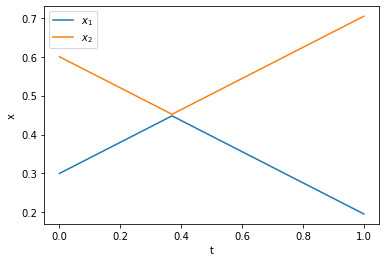

In [60]:
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x[:, 0])
plt.plot(t, x[:, 1])
plt.legend(['$x_1$', '$x_2$']);

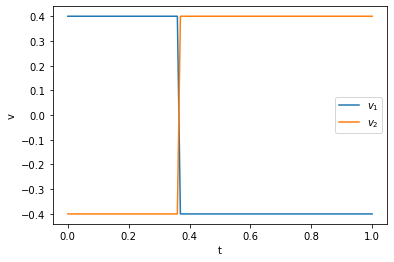

In [52]:
plt.xlabel('t')
plt.ylabel('v')
plt.plot(t, v[:, 0])
plt.plot(t, v[:, 1])
plt.legend(['$v_1$', '$v_2$']);

We can observe that velocity switch between two particles. Since the mass of each particle is same and the velocity is swap, these implies that the total momentum and energy of the system is conserved.